# Switch to estimagic

In this exercise you will switch the previous example to estimagic.

## Resources

- [Optimization tutorial](https://estimagic.readthedocs.io/en/stable/getting_started/first_optimization_with_estimagic.html)


In [1]:
import estimagic as em
import numpy as np

## Task 1: Simple switch

- Copy your criterion function and start parameters from the previous example without any changes. 
- Use `em.minimize` to solve the optimization problem. For reasons you will learn later, estimagic has no default algorithm. You can set `algorithm="scipy_neldermead"` for now and will learn how to pick algorithms later. 
- Look at `res.params` and `res.criterion` to make sure the optimization succeeded

## Solution 1:

In [2]:
def f(x):
    a = x[0]
    b = x[1:4]
    C = x[4:].reshape(2, 2)

    value = (
        (a - np.pi) ** 2
        + np.linalg.norm(b - np.arange(3))
        + np.linalg.norm(C - np.eye(2))
    )
    return value

x0 = np.zeros(8)

In [3]:
res = em.minimize(
    criterion=f,
    params=x0,
    algorithm="scipy_neldermead",
)

In [4]:
res.params

array([ 3.08575648e+00,  8.24088163e-04,  9.98500289e-01,  1.99960880e+00,
        1.45089020e+00, -1.16259426e+00, -7.61279389e-01,  5.92688982e-01])

In [5]:
res.criterion

1.5215720702015965

## Task 2: More flexible `params`

In estimagic, parameters can be arbitrary [pytrees](https://jax.readthedocs.io/en/latest/pytrees.html). In the current example, a dictionary with the keys `"a"`, `"b"` and `"C"` would be a good choice. 

- Adjust your function such that it takes a dictionary of parameters instead of a flat numpy array.
- re-run the optimization with `em.minimize` with the start parameters given below
- Look at `res.params` and `res.criterion` to make sure that the optimization worked.

## Solution 2:

In [6]:
start_params = {"a": 0, "b": np.zeros(3), "C": np.zeros((2, 2))}


def new_f(x):
    value = (
        (x["a"] - np.pi) ** 2
        + np.linalg.norm(x["b"] - np.arange(3))
        + np.linalg.norm(x["C"] - np.eye(2))
    )
    return value

In [7]:
res = em.minimize(
    criterion=new_f,
    params=start_params,
    algorithm="scipy_neldermead",
)

In [8]:
res.params

{'a': 3.0857564838295657,
 'b': array([8.24088163e-04, 9.98500289e-01, 1.99960880e+00]),
 'C': array([[ 1.4508902 , -1.16259426],
        [-0.76127939,  0.59268898]])}

In [9]:
res.criterion

1.5215720702015965

## Task 3: Plotting

Use `em.criterion_plot` and `em.params_plot` to visualize the convergence of your optimization. Use the `selector` argument of `em.params_plot` to visualize only a subset of the parameters. Example: `selector=lambda params: params["b"]`.

## Solution 3:

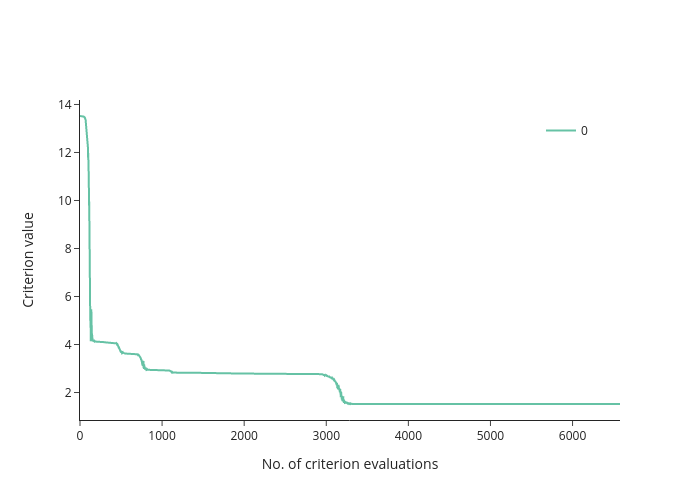

In [10]:
fig = em.criterion_plot(res)
fig.show(renderer="png")

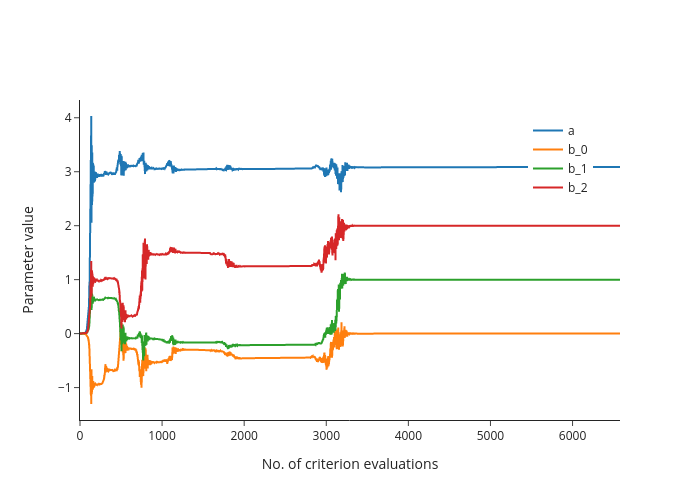

In [11]:
fig = em.params_plot(res, selector=lambda params: (params["a"], params["b"]))
fig.show(renderer="png")